In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data.csv',sep=';',dtype=str)

In [3]:
data = data.fillna('-1')

In [4]:
data = data[data['Você sofreu uma nova lesão do ligamento cruzado anterior?']!='-1']

In [5]:
pd.options.display.max_columns = None
data.head(5)

,Peso (Kg),Altura (m),IMC,Idade,Sexo,Dominância,Membro Lesionado,Tempo de Lesão (Meses),Tempo de PO (Meses),Tempo Lesão-PO,Lesões Associadas,Tipo de Enxerto,Prática Esportiva,Retorno ao Esporte,Pretende Retornar,Nível Pré-Lesão,PT (Extensão 60 - ML),PT (Extensão 60 - MNL),PT (Flexão 60 - ML),PT (Flexão 60 - MNL),PT (Extensão 300 - ML),PT (Extensão 300 - MNL),PT (Flexão 300 - ML),PT (Flexão 300 - MNL),PT/BW (ML Extensão 60),PT/BW (MNL Extensão 60),PT/BW (ML Flexão 60),PT/BW (MNL Flexão 60),PT/BW (ML Extensão 300),PT/BW (MNL Extensão 300),PT/BW (ML Flexão 300),PT/BW (MNL Flexão 300),Relação Ago/Ant (ML 60),Relação Ago/Ant (MNL 60),Relação Ago/Ant (ML 300),Relação Ago/Ant (MNL 300),ISM Extensão 60,ISM Flexão 60,ISM Extensão 300,ISM Flexão 300,Total Work (Extensão 60 - ML),Total Work (Extensão 60 - MNL),Total Work (ISM Extensão 60),Total Work (Flexão 60 - ML),Total Work (Flexão 60 - MNL),Total Work (ISM flexão 60),Work Fatigue (Extensão 60 - ML),Work Fatigue (Extensão 60 - MNL),Work Fatigue (Flexão 60 - ML),Work Fatigue (Flexão 60 - MNL),AVG. POWER (Extensão 60 - ML),AVG. POWER (Extensão 60 - MNL),AVG. POWER (Flexão 60 - ML),AVG. POWER (Flexão 60 - MNL),Total Work (Extensão 300 - ML),Total Work (Extensão 300 - MNL),Total Work (ISM Extensão 300),Total Work (Flexão 300 - ML),Total Work (Flexão 300 - MNL),Total Work (ISM flexão 300),Work Fatigue (Extensão 300 - ML),Work Fatigue (Extensão 300 - MNL),Work Fatigue (Flexão 300 - ML),Work Fatigue (Flexão 300 - MNL),AVG. POWER (Extensão 300- ML),AVG. POWER (Extensão 300 - MNL),AVG. POWER (Flexão 300 - ML),AVG. POWER (Flexão 300 - MNL),Estabilidade Global ML,Desvio Padrão Global ML,Estabilidade Global MNL,Desvio Padrão Global MNL,Diferença Global (%),Estabilidade Antero Posterior ML,Desvio Padrão Antero-Posterior ML,Estabilidade Antero-Posterior MNL,Desvio Padrão Antero-Posterior MNL,Diferença Antero-Posterior (%),Estabilidade Medio-Lateral ML,Desvio Padrão Medio-Lateral ML,Estabilidade Medio-Lateral MNL,Desvio Padrão Medio-Lateral MNL,Diferença Medio-Lateral (%),IKDC,ACL-RSI,Tempo avaliação - acompanhamento (meses),Idade atual (Anos),Altura Atual (m),Peso Atual (kg),IMC Atual,Você sofreu uma nova lesão do ligamento cruzado anterior?,Lesão contralateral ou no enxerto?,Você retornou a praticar o mesmo esporte que praticava antes da primeira lesão?,Qual o esporte que você praticava antes da lesão?,Retornou ao mesmo nível de antes da lesão?,"Se não para a pergunta anterior, tem intenção de retornar?",Você pratica alguma atividade física hoje em dia?,Tegner
0,93,"1,78","29,35",23,1,1,1,36,9,27,1,1,3,2,1,-1,"133,6","271,3","80,3","119,7","91,8","138,4","50,9","71,3","144,3","291,7","86,7","128,7","99,1","149,4","54,9",77,"60,1","44,12089937","55,4","51,5","50,75562108","32,91562239","33,7","28,7","580,3","1111,6","47,8","305,6","979,2","68,8","10,6","6,4","35,8","34,2",82,"151,2","41,5","96,1","1570,2","2089,2","24,8","788,8","1048,6","24,8",19,"44,5","28,4","31,3","227,9","308,6","106,2","136,2","2,6","1,32",4,"0,96","33,4","1,2","1,16","3,6",1,"67,3","2,2","1,08","1,3","1,3","69,9","57,4",35,40,26,"1,78",90,"28,40550436",2,-1,2,-1,-1,-1,2,4
1,70,"1,71","23,9",25,1,1,1,24,8,16,9,1,1,1,-1,2,"173,3","261,9","95,7","127,1","88,7","134,3","65,9","67,1","247,9","374,6","136,9","181,7","126,9",192,"94,3",96,"55,2","48,5","74,3",50,"33,8","24,7","33,9","1,8","909,1",1435,"36,6",445,"703,1","36,7","-34,8","-10,3",-50,"28,6","105,2","169,8","52,1","80,7","1721,8","2463,6","30,1","1146,2","1258,8","8,9","10,7","21,9",-22,"23,1","245,3","350,9","146,6","166,1","4,9","2,69","3,7","1,44",25,"3,6","2,72","2,1","1,48","42,8","2,9","1,65","2,8","1,26","4,4","57,5","31,6",24,28,"1,7",74,"25,60553633",2,-1,1,1,1,-1,1,7
2,119,"1,9",33,28,1,1,1,12,6,6,1,1,5,1,-1,2,"281,5","345,9","126,5","136,7","187,1","200,5","92,5","99,4","236,7","290,8","106,3","114,9","157,3","168,6","77,8","83,5","44,9","39,5","49,4","49,5","18,6","7,4","6,7","6,9","1416,8","1810,3","21,7","795,7","1357,2","41,4","20,3","8,7","34,7","44,3","

In [6]:
for c in data.columns:
    try:
        data[c] = data[c].str.replace(',','.')
    except Exception as e:
        print(e)

In [7]:
numeric_data = data.apply(pd.to_numeric, errors='coerce')

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

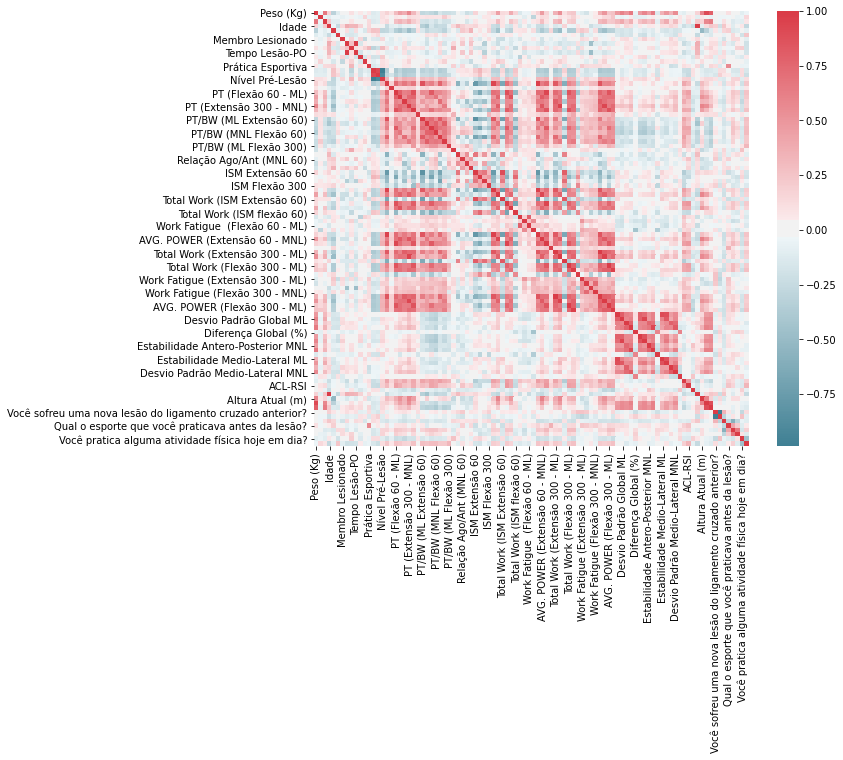

In [9]:
f, ax = plt.subplots(figsize=(10, 8))
corr = numeric_data.corr()
plot = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
figure = plot.get_figure()    
figure.savefig('correlation.png', dpi=400)

In [11]:
X = numeric_data.drop(labels=['Você sofreu uma nova lesão do ligamento cruzado anterior?'],
                      axis=1)
y = numeric_data['Você sofreu uma nova lesão do ligamento cruzado anterior?']

In [12]:
y = np.array(list(map(lambda x: x-1,y)))

In [13]:
categorical_cols = ['Sexo',
                    'Dominância',
                    'Membro Lesionado',
                    'Lesões Associadas',
                    'Tipo de Enxerto',
                    'Prática Esportiva',
                    'Retorno ao Esporte',
                    'Pretende Retornar',
                    'Lesão contralateral ou no enxerto?',
                    'Você retornou a praticar o mesmo esporte que praticava antes da primeira lesão?',
                    'Qual o esporte que você praticava antes da lesão?',
                    'Retornou ao mesmo nível de antes da lesão? ',
                    'Se não para a pergunta anterior, tem intenção de retornar?',
                    'Você pratica alguma atividade física hoje em dia?',
                    'Tegner']
numerical_cols = [x for x in X.columns if x
                    not in categorical_cols]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [16]:
mm = MinMaxScaler()
X_train_num = X_train[numerical_cols]
X_train_num = mm.fit_transform(X_train_num)
X_train = np.concatenate([X_train_num,X_train[categorical_cols]],axis=1)

X_test_num = X_test[numerical_cols]
X_test_num = mm.transform(X_test_num)
X_test = np.concatenate([X_test_num,X_test[categorical_cols]],axis=1)

In [17]:
smote = SMOTE(sampling_strategy='auto')
X_train, y_train = smote.fit_sample(X_train, y_train)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=X_train.shape[1]-28)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [19]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.8620689655172413

In [20]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.896551724137931

In [21]:
svm = SVC(kernel='rbf',degree=3,C=2.0)
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9310344827586207

In [40]:
nn = MLPClassifier(hidden_layer_sizes=[10,10,10],activation='relu',max_iter=400)
nn.fit(X_train,y_train)
nn.score(X_test,y_test)

0.9655172413793104

In [41]:
predictions = nn.predict_proba(X_test)
predictions = [f'Class {i.argmax()} with {i.max()*100}% probability' for i in predictions]

In [42]:
predictions[:10]

['Class 1 with 99.5460471282059% probability',
 'Class 1 with 99.1217235692066% probability',
 'Class 1 with 99.93963835767823% probability',
 'Class 0 with 50.928457901016365% probability',
 'Class 1 with 99.64269251594186% probability',
 'Class 1 with 98.72801470435928% probability',
 'Class 1 with 99.87223028425845% probability',
 'Class 1 with 88.93966572071031% probability',
 'Class 1 with 99.97127531054844% probability',
 'Class 1 with 99.8356417136529% probability']

In [25]:
print(classification_report(y_test,dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.96      0.88      0.92        26

    accuracy                           0.86        29
   macro avg       0.68      0.78      0.71        29
weighted avg       0.90      0.86      0.88        29



In [26]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.90      1.00      0.95        26

    accuracy                           0.90        29
   macro avg       0.45      0.50      0.47        29
weighted avg       0.80      0.90      0.85        29



/Users/goncalves/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
print(classification_report(y_test,svm.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.93      1.00      0.96        26

    accuracy                           0.93        29
   macro avg       0.96      0.67      0.73        29
weighted avg       0.94      0.93      0.92        29



In [43]:
print(classification_report(y_test,nn.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.96      1.00      0.98        26

    accuracy                           0.97        29
   macro avg       0.98      0.83      0.89        29
weighted avg       0.97      0.97      0.96        29



##### Tensorflow

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer

In [30]:
y_train_oh = np.zeros((y_train.size, y_train.max()+1))
y_train_oh[np.arange(y_train.size),y_train] = 1

y_test_oh = np.zeros((y_test.size, y_test.max()+1))
y_test_oh[np.arange(y_test.size),y_test] = 1

In [31]:
model = Sequential()
model.add(Dense(10,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
model.fit(X_train,y_train_oh,epochs=400,verbose=0,batch_size=1)

In [33]:
model.evaluate(X_test,y_test_oh)

1/1 [==============================] - 0s 3ms/step - loss: 1.1417 - accuracy: 0.9310


[1.1416884660720825, 0.931034505367279]

In [34]:
predictions = model.predict(X_test)

In [35]:
prediction_text = [f'Class {i.argmax()} with {i.max()*100}% probability' for i in predictions]

In [36]:
prediction_labels = [i.argmax() for i in predictions]

In [37]:
print(classification_report(prediction_labels,y_test))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.93      0.96        28

    accuracy                           0.93        29
   macro avg       0.67      0.96      0.73        29
weighted avg       0.98      0.93      0.95        29



In [38]:
prediction_text[:10]

['Class 1 with 100.0% probability',
 'Class 1 with 100.0% probability',
 'Class 1 with 100.0% probability',
 'Class 1 with 99.9976396560669% probability',
 'Class 1 with 100.0% probability',
 'Class 1 with 100.0% probability',
 'Class 1 with 100.0% probability',
 'Class 1 with 99.99998807907104% probability',
 'Class 1 with 100.0% probability',
 'Class 1 with 100.0% probability']